In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# 2차원 입력 면 모델

## 데이터 불러오기

**Input data**: 2-dimension $\textbf{x} = (x_0,x_1)$
- For instance, (Sex, Height), (Sex, Diameter), (Height, Whole weight) ...

**Target data**: $\textbf{t} = (\text{Rings})$

$ \rightarrow \\
    \textbf{x} = \begin{bmatrix}
        x_{00} & x_{01} \\
        x_{10} & x_{11} \\
        \vdots & \vdots \\
        x_{N-1,0} & x_{N-1, 1}
        \end{bmatrix}, \qquad
    \textbf{t} = \begin{bmatrix}
        t_{0} \\
        x_{1} \\
        \vdots \\
        x_{N-1}
        \end{bmatrix}
$

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

def load_abalone_dataset():
    df = pd.read_csv('./abalone.csv')
    df = df.drop(df.loc[df['Height']>0.3].index, axis=0)
    df = pd.get_dummies(df) # One-Hot Encoding
    
    X0, X1, T = df['Length'], df['Diameter'], df['Rings']
    return X0, X1, T

if __name__=="__main__":
    X0, X1, T = load_abalone_dataset()
    df_2D = pd.concat([X0, X1, T], axis=1)
    print(df_2D.head(10))

   Length  Diameter  Rings
0   0.455     0.365     15
1   0.350     0.265      7
2   0.530     0.420      9
3   0.440     0.365     10
4   0.330     0.255      7
5   0.425     0.300      8
6   0.530     0.415     20
7   0.545     0.425     16
8   0.475     0.370      9
9   0.550     0.440     19


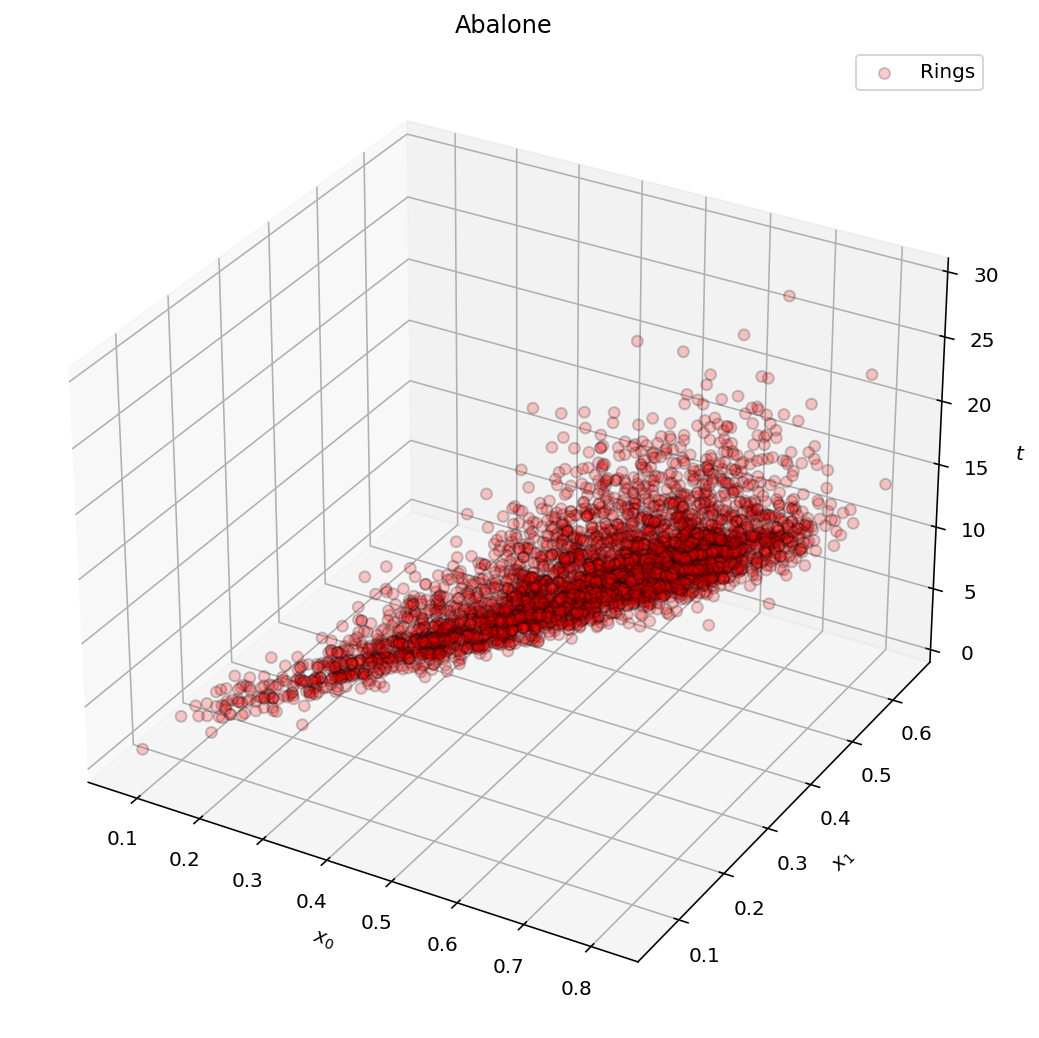

In [38]:
def show_data2(ax, x0, x1, t):
    ax.scatter(x0, x1, t,
               facecolor='red',
               edgecolor='k',
               s = 30, # size
               alpha = 0.2,
               label = "Rings")

if __name__=="__main__":
    plt.figure(figsize=(9,9))
    ax = plt.subplot(1, 1, 1, projection='3d')
    show_data2(ax, X0, X1, T)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.set_zlabel('$t$')
    ax.set_title("Abalone")
    ax.legend()
    
    plt.show()

## 면 모델
(Height, Diameter) data can be expressed as 'Plane' model.  
$ y(x_0, x_1) = w_0x_1 + w_1x_1 + w_2 $

$
\rightarrow \\
\textbf{y = w}^T\textbf{x} \qquad where \qquad \textbf{x} = 
    \begin{bmatrix} x_0 \\ x_1 \\ 1 \end{bmatrix}, \qquad \textbf{w} = \begin{bmatrix}w_0 \\ w_1 \\ w_2 \end{bmatrix}
$

ValueError: shape mismatch: objects cannot be broadcast to a single shape

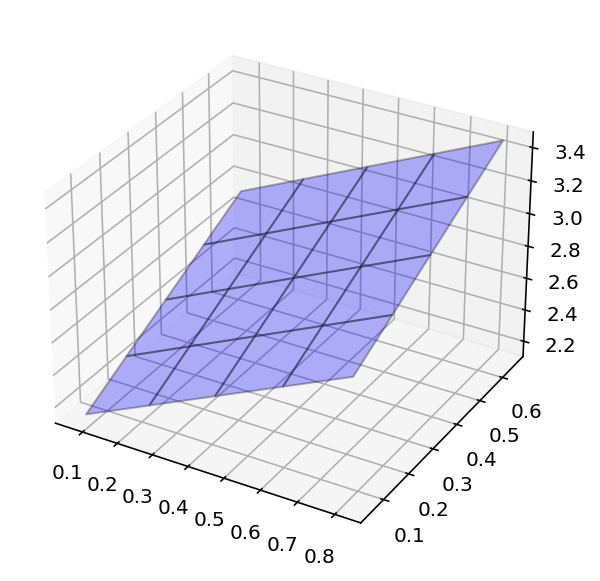

In [39]:
def show_plane(ax, x0, x1, w):
    x0 = np.linspace(min(x0), max(x0), 5)
    x1 = np.linspace(min(x1), max(x1), 5)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = w[0]*xx0 + w[1]+xx1 + w[2]
    ax.plot_surface(xx0, xx1, y, rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='k')
    
def mse_plane(x0, x1, t, w):
    y = w[0]*x0 + w[1]*x1 + x[2]
    mse = np.mean((y-t)**2)
    return mse

if __name__=="__main__":
    plt.figure(figsize=(6, 5))
    ax = plt.subplot(1,1,1, projection='3d')
    W = [1, 1, 1] # test
    show_plane(ax, X0, X1, W)
    show_data2(ax, X0, X1, W)
    mse = mse_plane(X0, X1, T, W)
    print(f"SD={i}" for i in range(10))